In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [2]:
train_data_dir = 'C:/Users/91830/OneDrive/Desktop/Project_dataset/Train'
val_data_dir = 'C:/Users/91830/OneDrive/Desktop/Project_dataset/Validation'


In [3]:
img_size = 224
batch_size = 32


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_data_dir,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                class_mode='categorical')


Found 9871 images belonging to 2 classes.
Found 1067 images belonging to 2 classes.


In [5]:
base_model = DenseNet169(weights='imagenet', include_top=False)

for layer in base_model.layers:
    layer.trainable = False


In [6]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)


In [7]:
predictions = Dense(2, activation='softmax')(x)


In [8]:
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [1]:
# epochs = 10
# steps_per_epoch = train_generator.n // batch_size
# val_steps = val_generator.n // batch_size

# model.fit(train_generator,
#           epochs=epochs,
#           steps_per_epoch=steps_per_epoch,
#           validation_data=val_generator,
#           validation_steps=val_steps)


In [10]:
model.save('C:/Users/91830/OneDrive/Desktop/Project_dataset/Models/Densenet169.h5')

In [9]:
model=tf.keras.models.load_model('C:/Users/91830/OneDrive/Desktop/Project_dataset/Models/Densenet169.h5')

In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import DenseNet201, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'C:/Users/91830/OneDrive/Desktop/Project_dataset/Test/Fire/55_frame_180.jpg'
print(img_path)
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = model.predict(img_array)
if prediction[0][0] > prediction[0][1]:
    print('Fire Detected')
else:
    print('No Fire Detected')

1/1 [==============================] - 2s 2s/step
Fire Detected


In [13]:
IMG_SIZE = (224, 224)
# prepare the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('C:/Users/91830/OneDrive/Desktop/Project_dataset/Test/', target_size=IMG_SIZE, batch_size=32, class_mode='categorical')

# evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Found 1167 images belonging to 2 classes.
37/37 [==============================] - 71s 2s/step - loss: 0.8200 - accuracy: 0.9306
Test loss: 0.8200
Test accuracy: 0.9306


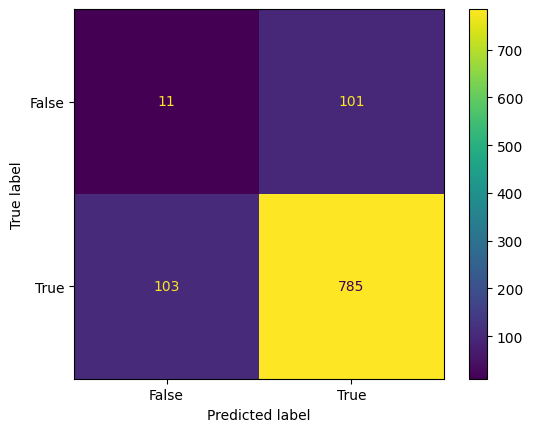

In [14]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()